# <center>LOAN Eligibility citeria</center>

## Introducation
Loan eligibility prediction helps banks decide if a person or business can get a loan. It looks at things like income, credit score, and past loans to check if they can repay the money. Banks use computer programs and past data to make this decision quickly and accurately.

### Major observation from the data
1.	Applicants who are male and married tends to have more applicant income whereas applicant who are female and married have least applicant income
2.	Applicants who are male and are graduated have more applicant income over the applicants who have not graduated.
3.	Again the applicants who are married and graduated have the more applicant income.
4.	Applicants who are not self employed have more applicant income than the applicants who are self employed.
5.	Applicants who have more dependents have least applicant income whereas applicants which have no dependents have maximum applicant income.
6.	Applicants who have property in urban and have credit history have maximum applicant income
7.	Applicants who are graduate and have credit history have more applicant income.
8.	Loan Amount is linearly dependent on Applicant income
9.	From heatmaps, applicant income and loan amount are highly positively correlated.
10.	Male applicants are more than female applicants.
11.	No of applicants who are married are more than no of applicants who are not married.
12.	Applicants with no dependents are maximum.
13.	Applicants with graduation are more than applicants whith no graduation.
14.	Property area is to be find more in semi urban areas and minimum in rural areas.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train=pd.read_csv(r'C:\Users\Rutesh\Downloads\train_ctrUa4K - train_ctrUa4K.csv')

### Explore Data set

In [7]:
df_train.head() #show first 5 row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_train.describe() #show numeric columns stastical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df_train.shape

(614, 13)

### Data cleaning

In [12]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling Missing value

In [14]:
# Fill missing values for numerical features with their mean
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(), inplace=True)

# Fill missing values for categorical features with their mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [15]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df_train['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df_train=df_train.replace(to_replace='3+',value=4)

In [18]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df_train['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

### Data Visulization

#### Univariate Analysis of Numerical Features


##### Questions: What is the distribution of ApplicantIncome, LoanAmount, and Credit_History?

Histograms to visualize the distribution.
Box plots to detect outliers.

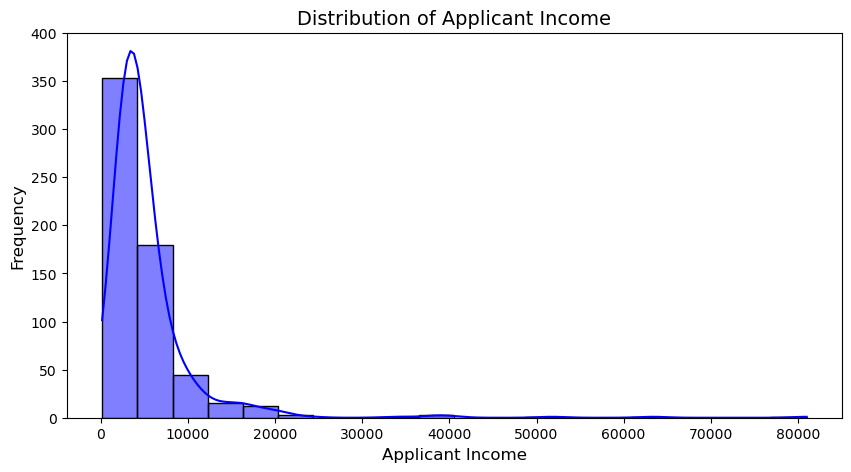

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['ApplicantIncome'], bins=20, kde=True, color='blue')
plt.title('Distribution of Applicant Income', fontsize=14)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

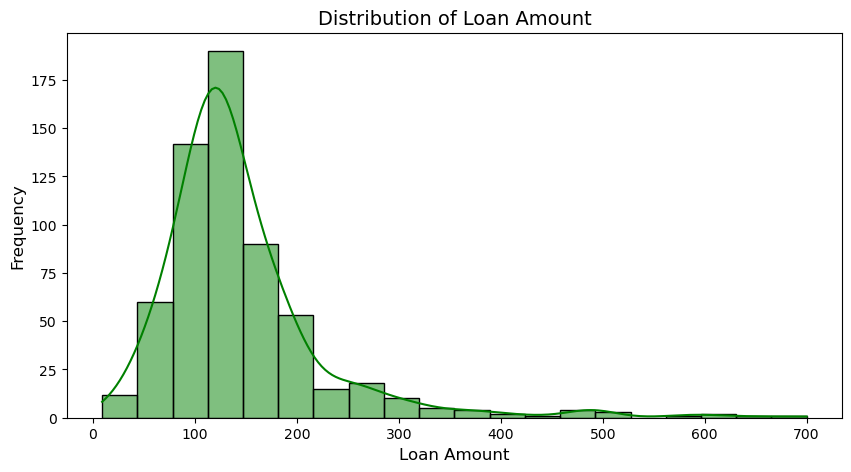

In [25]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 5))
sns.histplot(df_train['LoanAmount'], bins=20, kde=True, color='green')
plt.title('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

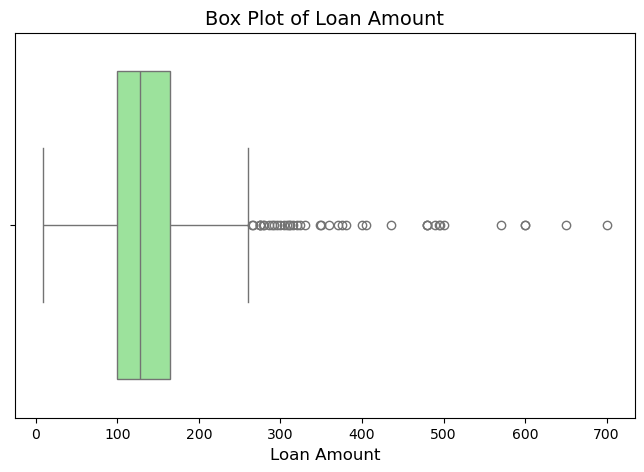

In [26]:
# Box plot for Loan Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['LoanAmount'], color='lightgreen')
plt.title('Box Plot of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.show()

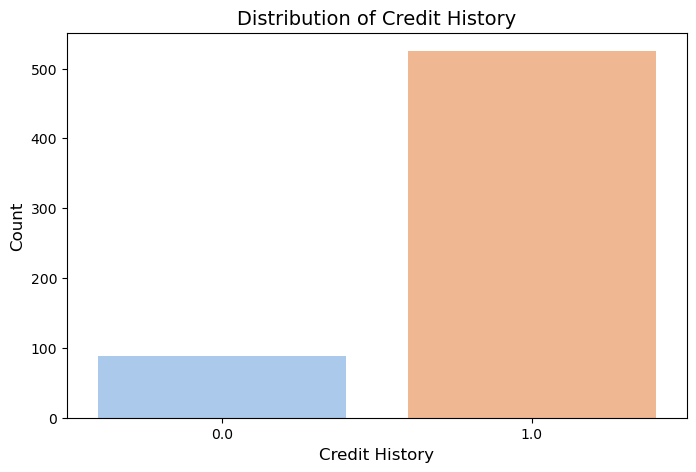

In [27]:
# Distribution of Credit History
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['Credit_History'], palette='pastel')
plt.title('Distribution of Credit History', fontsize=14)
plt.xlabel('Credit History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Univariate Analysis of Categorical Features


###### Q:How do Gender, Married, Education, Self_Employed, and Property_Area distribute? Visualizations:

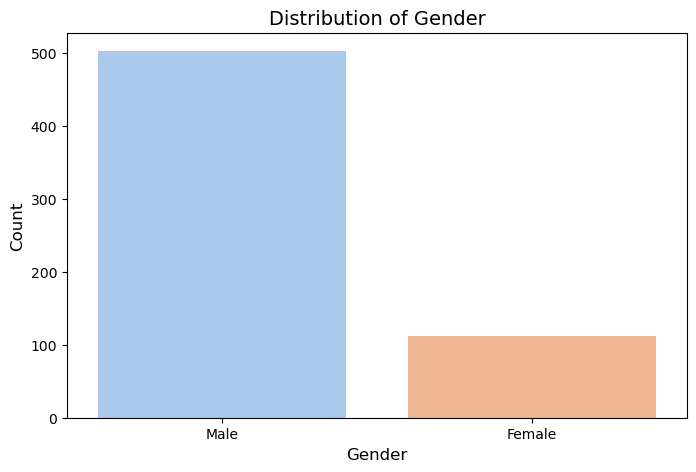

In [30]:
# Bar plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_train, palette='pastel')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

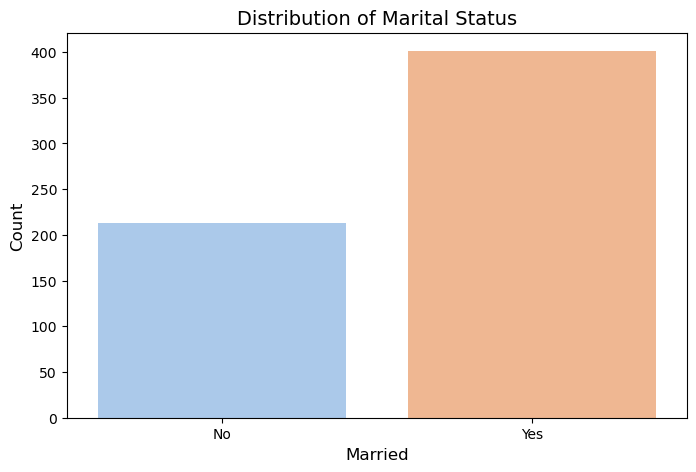

In [31]:
# Bar plot for Married
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', data=df_train, palette='pastel')
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

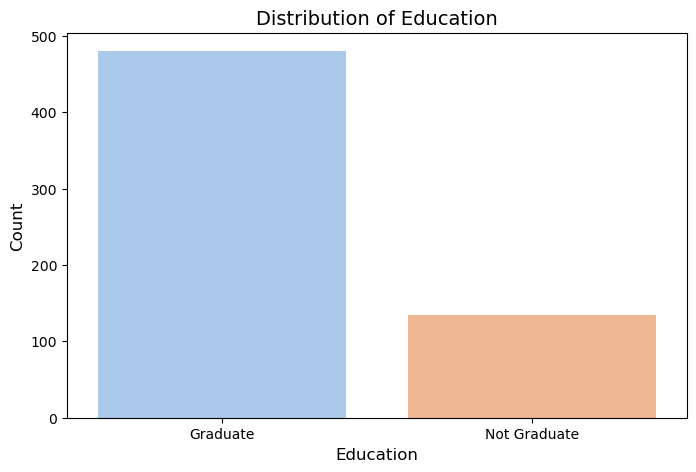

In [32]:
# Bar plot for Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df_train, palette='pastel')
plt.title('Distribution of Education', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

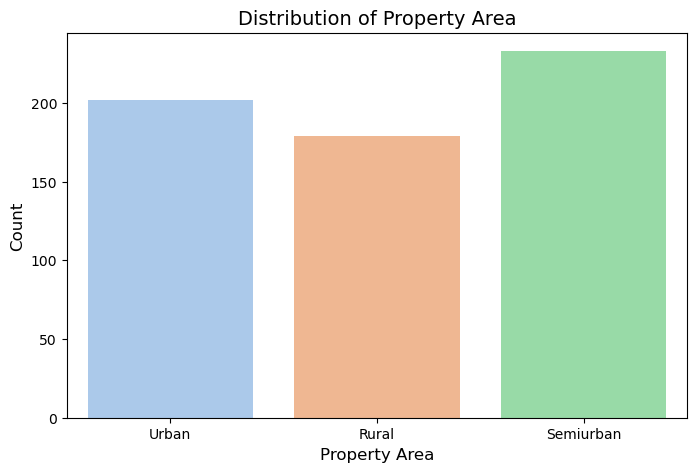

In [33]:
# Bar plot for Property_Area
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', data=df_train, palette='pastel')
plt.title('Distribution of Property Area', fontsize=14)
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Numerical Features

Identify the range, central tendency, and any skewness in the data 
Use box plots to detect any significant outliers.

                                                                    
Categorical Features

Understand the distribution of categories 

#### Bivariate Analysis


##### Loan_Status vary with ApplicantIncome

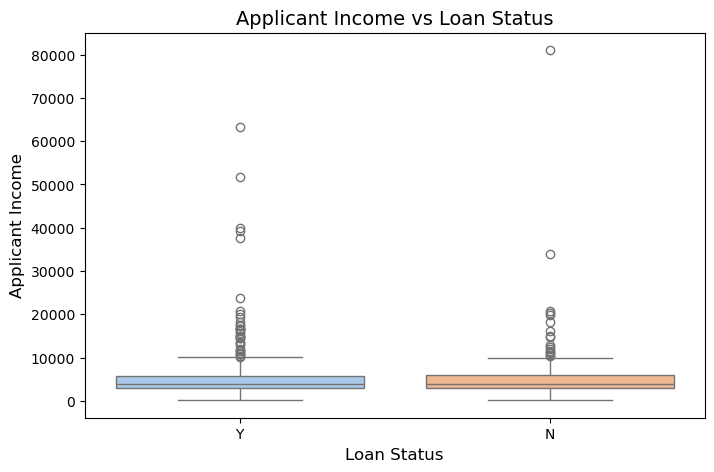

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_train, palette='pastel')
plt.title('Applicant Income vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Applicant Income', fontsize=12)
plt.show()

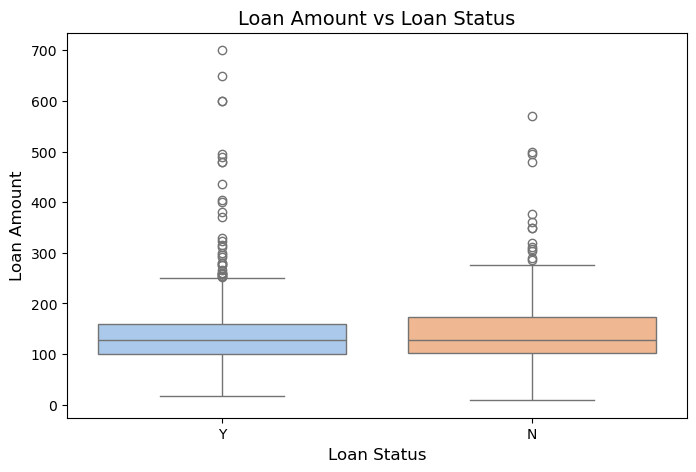

In [38]:
#Box Plot: Loan_Status vs LoanAmount

plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_train, palette='pastel')
plt.title('Loan Amount vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.show()


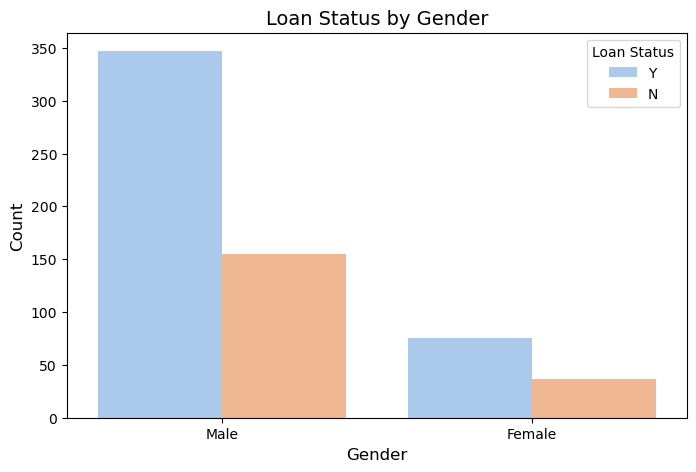

In [39]:
#Gender vs Loan_Status

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=df_train, palette='pastel')
plt.title('Loan Status by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

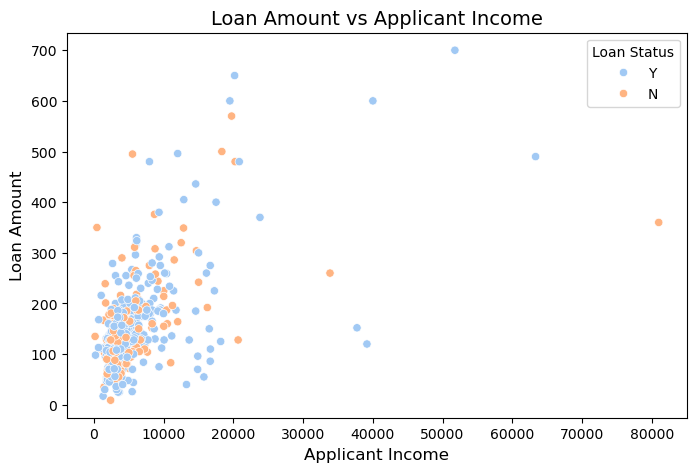

In [40]:
#Scatter Plot: ApplicantIncome vs LoanAmount

plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df_train, palette='pastel')
plt.title('Loan Amount vs Applicant Income', fontsize=14)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

Higher ApplicantIncome or CoapplicantIncome did not always guarantee loan approval, suggesting other factors are more influential.
Applicants with smaller loan amounts (LoanAmount) were more likely to have their loans approved.


#### Multivariate Analysis


###### Visualizations:

Pair Plots to explore relationships between multiple continuous variables.
Heatmaps to visualize correlations between numeric variables

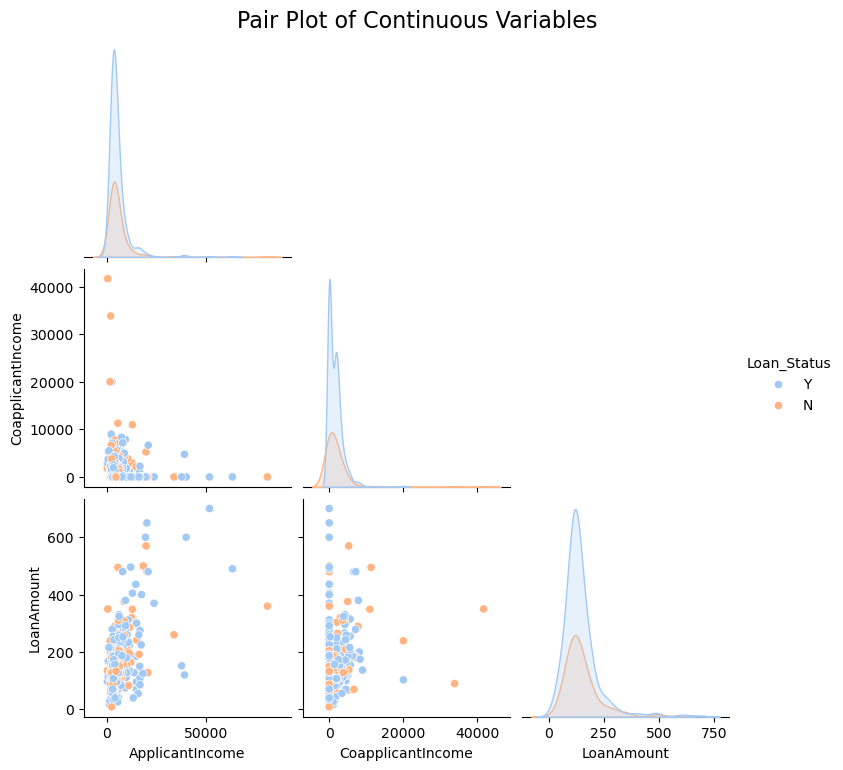

In [44]:
sns.pairplot(df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], 
             hue='Loan_Status', palette='pastel', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Continuous Variables', y=1.02, fontsize=16)
plt.show()

#### Heatmap

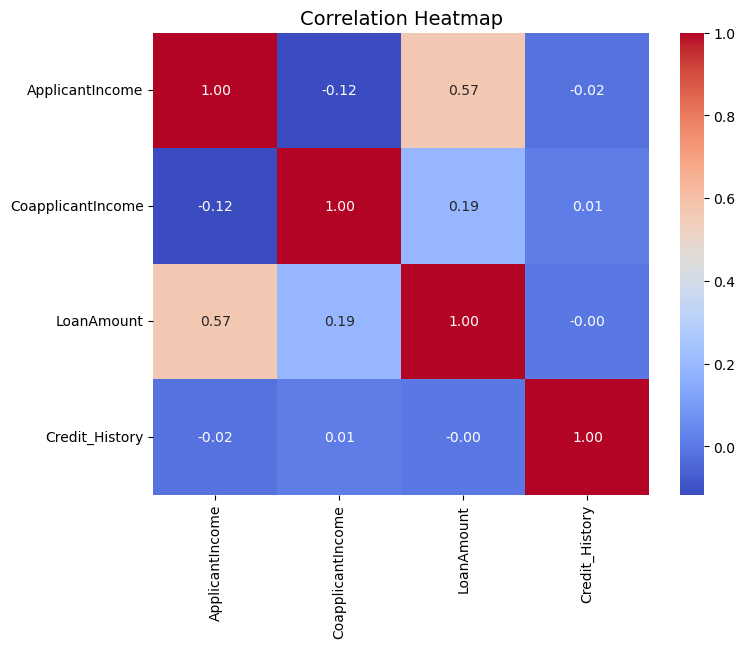

In [46]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

### Drop

In [48]:
df_train.drop('Loan_ID',axis=1,inplace=True) #NOT ANY USE HENCE DROP


In [49]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Encoding

In [51]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df=['Gender','Married','Education','Property_Area','Self_Employed','Loan_Status']
df_train[df]=oe.fit_transform(df_train[df])


In [52]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


### Feature(x) and Target(y)

In [54]:
x = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [55]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


In [56]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [57]:
y.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)

y.value_counts()

Loan_Status
1.0    422
0.0    422
Name: count, dtype: int64

### Train_test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=11)

### Scaling data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [63]:
X_train

array([[ 0.51165744,  0.78626401,  0.1623653 , ...,  0.2767697 ,
         0.58155878,  1.2898133 ],
       [ 0.51165744,  0.78626401, -0.70947822, ..., -2.50851166,
         0.58155878, -1.33249541],
       [ 0.51165744,  0.78626401, -0.70947822, ...,  0.2767697 ,
         0.58155878,  1.2898133 ],
       ...,
       [ 0.51165744,  0.78626401,  1.03420882, ..., -2.50851166,
         0.58155878, -0.02134106],
       [-2.12456587, -1.39726167, -0.70947822, ...,  0.2767697 ,
         0.58155878, -0.02134106],
       [-1.90804076, -1.39726167,  0.89099181, ...,  0.2767697 ,
         0.58155878,  1.2898133 ]])

### Model Building

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

### Model Evaluation 

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254



### Solver Tuning 

#### liblinear

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921


#### saga

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921


#### newton-cholesky

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921


#### newton-cg

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921


#### lbfgs #default solver

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921


In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')
print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")

Training Score : 0.7677966101694915
Testing Score : 0.7480314960629921
Accuracy : 0.7480314960629921
ROC : 0.7521712158808932
[[ 75  55]
 [  9 115]]
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       130
         1.0       0.68      0.93      0.78       124

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.74       254
weighted avg       0.79      0.75      0.74       254



### Naive bayes

In [81]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [82]:

br=BernoulliNB()

In [83]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    print(f"Trainig ac:{train}\n\n Testing ac:{test}\n\n")
    print(classification_report(y_pred,y_test))
    return model

In [84]:
mymodel(br)

Trainig ac:0.7423728813559322

 Testing ac:0.7677165354330708


              precision    recall  f1-score   support

         0.0       0.58      0.95      0.72        79
         1.0       0.97      0.69      0.80       175

    accuracy                           0.77       254
   macro avg       0.77      0.82      0.76       254
weighted avg       0.85      0.77      0.78       254



BernoulliNB()

### Support vector machine

In [86]:
from sklearn.svm import SVC

In [87]:
svc=SVC()

In [88]:
mymodel(svc)

Trainig ac:0.788135593220339

 Testing ac:0.7795275590551181


              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73        80
         1.0       0.98      0.70      0.81       174

    accuracy                           0.78       254
   macro avg       0.78      0.83      0.77       254
weighted avg       0.86      0.78      0.79       254



SVC()

##### Kernal={'linear', 'poly', 'rbf', 'sigmoid'} 

In [90]:
svm=SVC(kernel='linear')

In [91]:
mymodel(svm)

Trainig ac:0.7610169491525424

 Testing ac:0.7559055118110236


              precision    recall  f1-score   support

         0.0       0.53      0.99      0.69        70
         1.0       0.99      0.67      0.80       184

    accuracy                           0.76       254
   macro avg       0.76      0.83      0.74       254
weighted avg       0.86      0.76      0.77       254



SVC(kernel='linear')

#### Hyper parameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
para_grid={'C':[1,10],'gamma':[1,10]}

In [95]:
gs=GridSearchCV(svm,para_grid,verbose=3)

In [96]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.797 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.754 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.763 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.703 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.746 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.797 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.754 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.763 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.703 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.746 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.797 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [97]:
gs.best_params_

{'C': 10, 'gamma': 1}

In [98]:
SVM=SVC(C=1,gamma=1,kernel='linear')

In [99]:
mymodel(SVM)

Trainig ac:0.7610169491525424

 Testing ac:0.7559055118110236


              precision    recall  f1-score   support

         0.0       0.53      0.99      0.69        70
         1.0       0.99      0.67      0.80       184

    accuracy                           0.76       254
   macro avg       0.76      0.83      0.74       254
weighted avg       0.86      0.76      0.77       254



SVC(C=1, gamma=1, kernel='linear')

In [100]:
svm=SVC(kernel='poly')

In [101]:
mymodel(svm)

Trainig ac:0.7745762711864407

 Testing ac:0.7322834645669292


              precision    recall  f1-score   support

         0.0       0.54      0.90      0.67        78
         1.0       0.94      0.66      0.77       176

    accuracy                           0.73       254
   macro avg       0.74      0.78      0.72       254
weighted avg       0.81      0.73      0.74       254



SVC(kernel='poly')

In [102]:
svm=SVC(kernel='rbf')

In [103]:
mymodel(svm)

Trainig ac:0.788135593220339

 Testing ac:0.7795275590551181


              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73        80
         1.0       0.98      0.70      0.81       174

    accuracy                           0.78       254
   macro avg       0.78      0.83      0.77       254
weighted avg       0.86      0.78      0.79       254



SVC()

In [104]:
svm=SVC(kernel='sigmoid')

In [105]:
mymodel(svm)

Trainig ac:0.6644067796610169

 Testing ac:0.6771653543307087


              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64        98
         1.0       0.80      0.63      0.71       156

    accuracy                           0.68       254
   macro avg       0.68      0.69      0.67       254
weighted avg       0.71      0.68      0.68       254



SVC(kernel='sigmoid')

### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [108]:
mymodel(knn)

Trainig ac:0.8932203389830509

 Testing ac:0.7637795275590551


              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       120
         1.0       0.80      0.74      0.77       134

    accuracy                           0.76       254
   macro avg       0.76      0.77      0.76       254
weighted avg       0.77      0.76      0.76       254



KNeighborsClassifier(n_neighbors=3)

In [109]:
ac_list=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    ac=accuracy_score(y_test,y_pred)

    ac_list.append(ac)

In [110]:
ac_list

[0.7795275590551181,
 0.7322834645669292,
 0.7637795275590551,
 0.7322834645669292,
 0.7755905511811023,
 0.7519685039370079,
 0.7755905511811023,
 0.7440944881889764,
 0.7559055118110236,
 0.7559055118110236,
 0.7440944881889764,
 0.7519685039370079,
 0.7559055118110236,
 0.7480314960629921,
 0.7440944881889764,
 0.7559055118110236,
 0.7480314960629921,
 0.7637795275590551,
 0.7440944881889764,
 0.7559055118110236,
 0.7480314960629921,
 0.7598425196850394,
 0.7598425196850394,
 0.7519685039370079,
 0.7519685039370079,
 0.7480314960629921,
 0.7440944881889764,
 0.7322834645669292,
 0.7401574803149606,
 0.7244094488188977,
 0.7362204724409449,
 0.7362204724409449,
 0.7362204724409449,
 0.7440944881889764,
 0.7362204724409449,
 0.7283464566929134,
 0.7362204724409449,
 0.7244094488188977,
 0.7401574803149606,
 0.7244094488188977,
 0.7244094488188977,
 0.7283464566929134,
 0.7283464566929134,
 0.7283464566929134,
 0.7204724409448819,
 0.7401574803149606,
 0.7322834645669292,
 0.7362204724

In [111]:
max(ac_list)

0.7795275590551181

In [112]:
knn=KNeighborsClassifier(n_neighbors=1)


In [113]:
mymodel(knn)

Trainig ac:1.0

 Testing ac:0.7795275590551181


              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       128
         1.0       0.78      0.77      0.78       126

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



KNeighborsClassifier(n_neighbors=1)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt=DecisionTreeClassifier()

In [116]:
mymodel(dt)

Trainig ac:1.0

 Testing ac:0.7755905511811023


              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       127
         1.0       0.78      0.76      0.77       127

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



DecisionTreeClassifier()

### Hypertunning in parameter in dt

In [118]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Max depth={i} accuracy={ac}')

Max depth=1 accuracy=0.7795275590551181
Max depth=2 accuracy=0.7795275590551181
Max depth=3 accuracy=0.8149606299212598
Max depth=4 accuracy=0.8149606299212598
Max depth=5 accuracy=0.8188976377952756
Max depth=6 accuracy=0.8188976377952756
Max depth=7 accuracy=0.8149606299212598
Max depth=8 accuracy=0.8070866141732284
Max depth=9 accuracy=0.7913385826771654
Max depth=10 accuracy=0.7913385826771654
Max depth=11 accuracy=0.7834645669291339
Max depth=12 accuracy=0.7834645669291339
Max depth=13 accuracy=0.7913385826771654
Max depth=14 accuracy=0.7952755905511811
Max depth=15 accuracy=0.7637795275590551
Max depth=16 accuracy=0.7598425196850394
Max depth=17 accuracy=0.7716535433070866
Max depth=18 accuracy=0.7755905511811023
Max depth=19 accuracy=0.7716535433070866
Max depth=20 accuracy=0.7913385826771654
Max depth=21 accuracy=0.7795275590551181
Max depth=22 accuracy=0.7598425196850394
Max depth=23 accuracy=0.7637795275590551
Max depth=24 accuracy=0.7755905511811023
Max depth=25 accuracy=0.7

In [119]:
dt1=DecisionTreeClassifier(max_depth=3)

In [120]:
mymodel(dt1)

Trainig ac:0.8389830508474576

 Testing ac:0.8149606299212598


              precision    recall  f1-score   support

         0.0       0.66      0.97      0.79        89
         1.0       0.98      0.73      0.84       165

    accuracy                           0.81       254
   macro avg       0.82      0.85      0.81       254
weighted avg       0.87      0.81      0.82       254



DecisionTreeClassifier(max_depth=3)

### Min sample split

In [122]:
for i in range(2,111):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=2 accuracy=0.7874015748031497
Min sample split=3 accuracy=0.7637795275590551
Min sample split=4 accuracy=0.7598425196850394
Min sample split=5 accuracy=0.7755905511811023
Min sample split=6 accuracy=0.7637795275590551
Min sample split=7 accuracy=0.7677165354330708
Min sample split=8 accuracy=0.7716535433070866
Min sample split=9 accuracy=0.7755905511811023
Min sample split=10 accuracy=0.7677165354330708
Min sample split=11 accuracy=0.7795275590551181
Min sample split=12 accuracy=0.7716535433070866
Min sample split=13 accuracy=0.7755905511811023
Min sample split=14 accuracy=0.7755905511811023
Min sample split=15 accuracy=0.7952755905511811
Min sample split=16 accuracy=0.7795275590551181
Min sample split=17 accuracy=0.8110236220472441
Min sample split=18 accuracy=0.8149606299212598
Min sample split=19 accuracy=0.8149606299212598
Min sample split=20 accuracy=0.8149606299212598
Min sample split=21 accuracy=0.8110236220472441
Min sample split=22 accuracy=0.8110236220472441


In [123]:
for i in range(100,200):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=100 accuracy=0.8110236220472441
Min sample split=101 accuracy=0.8110236220472441
Min sample split=102 accuracy=0.8110236220472441
Min sample split=103 accuracy=0.8110236220472441
Min sample split=104 accuracy=0.8110236220472441
Min sample split=105 accuracy=0.8110236220472441
Min sample split=106 accuracy=0.8110236220472441
Min sample split=107 accuracy=0.8110236220472441
Min sample split=108 accuracy=0.8110236220472441
Min sample split=109 accuracy=0.8110236220472441
Min sample split=110 accuracy=0.8110236220472441
Min sample split=111 accuracy=0.8110236220472441
Min sample split=112 accuracy=0.8110236220472441
Min sample split=113 accuracy=0.8110236220472441
Min sample split=114 accuracy=0.8110236220472441
Min sample split=115 accuracy=0.8110236220472441
Min sample split=116 accuracy=0.8110236220472441
Min sample split=117 accuracy=0.8110236220472441
Min sample split=118 accuracy=0.8110236220472441
Min sample split=119 accuracy=0.8110236220472441
Min sample split=120

In [124]:
dt2=DecisionTreeClassifier(min_samples_split=100)

In [125]:
mymodel(dt2)

Trainig ac:0.8457627118644068

 Testing ac:0.8110236220472441


              precision    recall  f1-score   support

         0.0       0.66      0.96      0.78        90
         1.0       0.97      0.73      0.83       164

    accuracy                           0.81       254
   macro avg       0.81      0.84      0.81       254
weighted avg       0.86      0.81      0.82       254



DecisionTreeClassifier(min_samples_split=100)

### Min sample leaf

In [127]:
for i in range(2,111):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred=dt3.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample leaf={i} accuracy={ac}')

Min sample leaf=2 accuracy=0.7755905511811023
Min sample leaf=3 accuracy=0.7795275590551181
Min sample leaf=4 accuracy=0.7913385826771654
Min sample leaf=5 accuracy=0.7992125984251969
Min sample leaf=6 accuracy=0.7874015748031497
Min sample leaf=7 accuracy=0.7913385826771654
Min sample leaf=8 accuracy=0.7677165354330708
Min sample leaf=9 accuracy=0.7913385826771654
Min sample leaf=10 accuracy=0.7755905511811023
Min sample leaf=11 accuracy=0.8070866141732284
Min sample leaf=12 accuracy=0.8070866141732284
Min sample leaf=13 accuracy=0.7795275590551181
Min sample leaf=14 accuracy=0.7952755905511811
Min sample leaf=15 accuracy=0.7952755905511811
Min sample leaf=16 accuracy=0.7952755905511811
Min sample leaf=17 accuracy=0.7992125984251969
Min sample leaf=18 accuracy=0.7992125984251969
Min sample leaf=19 accuracy=0.8188976377952756
Min sample leaf=20 accuracy=0.8070866141732284
Min sample leaf=21 accuracy=0.8149606299212598
Min sample leaf=22 accuracy=0.8149606299212598
Min sample leaf=23 ac

In [128]:
dt3=DecisionTreeClassifier(min_samples_leaf=16)

In [129]:
mymodel(dt3)

Trainig ac:0.8457627118644068

 Testing ac:0.7952755905511811


              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78       110
         1.0       0.87      0.75      0.81       144

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.79       254
weighted avg       0.81      0.80      0.80       254



DecisionTreeClassifier(min_samples_leaf=16)

In [130]:
final=DecisionTreeClassifier(max_depth=3,min_samples_split=100,min_samples_leaf=16)

In [131]:
mymodel(final)

Trainig ac:0.8322033898305085

 Testing ac:0.8188976377952756


              precision    recall  f1-score   support

         0.0       0.65      0.99      0.79        86
         1.0       0.99      0.73      0.84       168

    accuracy                           0.82       254
   macro avg       0.82      0.86      0.81       254
weighted avg       0.88      0.82      0.82       254



DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=100)

### Random forest classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf=RandomForestClassifier()



In [135]:
mymodel(rf)

Trainig ac:1.0

 Testing ac:0.6653543307086615


              precision    recall  f1-score   support

         0.0       0.96      0.61      0.75       205
         1.0       0.35      0.90      0.51        49

    accuracy                           0.67       254
   macro avg       0.66      0.75      0.63       254
weighted avg       0.84      0.67      0.70       254



RandomForestClassifier()

#### Voting 

In [137]:
from sklearn.ensemble import VotingClassifier

In [138]:
Models=[]
Models.append(("Logistic regression",LogisticRegression()))
Models.append(("KNN classifier",KNeighborsClassifier()))
Models.append(("Decision tree classifies",DecisionTreeClassifier()))

In [139]:
vt=VotingClassifier(estimators=Models,voting='hard')


In [140]:
mymodel(vt)

Trainig ac:0.8847457627118644

 Testing ac:0.7992125984251969


              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78        97
         1.0       0.93      0.73      0.82       157

    accuracy                           0.80       254
   macro avg       0.80      0.82      0.80       254
weighted avg       0.83      0.80      0.80       254



VotingClassifier(estimators=[('Logistic regression', LogisticRegression()),
                             ('KNN classifier', KNeighborsClassifier()),
                             ('Decision tree classifies',
                              DecisionTreeClassifier())])

In [141]:
vt2=VotingClassifier(estimators=Models,voting='soft')


In [142]:
mymodel(vt2)

Trainig ac:0.9813559322033898

 Testing ac:0.7992125984251969


              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       117
         1.0       0.85      0.77      0.80       137

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



VotingClassifier(estimators=[('Logistic regression', LogisticRegression()),
                             ('KNN classifier', KNeighborsClassifier()),
                             ('Decision tree classifies',
                              DecisionTreeClassifier())],
                 voting='soft')

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
gb=GradientBoostingClassifier()


In [145]:
mymodel(gb)

Trainig ac:0.9186440677966101

 Testing ac:0.7204724409448819


              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76       167
         1.0       0.56      0.80      0.66        87

    accuracy                           0.72       254
   macro avg       0.72      0.74      0.71       254
weighted avg       0.76      0.72      0.73       254



GradientBoostingClassifier()

### ADAboost

In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
ada=AdaBoostClassifier()


In [149]:
mymodel(ada)

Trainig ac:0.8796610169491526

 Testing ac:0.5236220472440944


              precision    recall  f1-score   support

         0.0       0.98      0.52      0.68       247
         1.0       0.04      0.71      0.08         7

    accuracy                           0.52       254
   macro avg       0.51      0.62      0.38       254
weighted avg       0.96      0.52      0.66       254



AdaBoostClassifier()

In [150]:
from tabulate import tabulate
# List of models
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(estimators=Models),
    
    
  
]
# Names of the models
model_names = [
    "Logistic Regression",
    "SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "GradientBoosting",
    " Voting"
]  
train_accuracies = []
test_accuracies = []
for model in models:
    mymodel(model)
    train_acc = model.score(X_train, y_train)  # Training accuracy
    test_acc = model.score(X_test, y_test)  # Testing accuracy
    
    # Store accuracies
    train_accuracies.append(f"{round(train_acc * 100, 2)}%")
    test_accuracies.append(f"{round(test_acc * 100, 2)}%")

# Create the table data
table = []
for name, train_acc, test_acc in zip(model_names, train_accuracies, test_accuracies):
    table.append([name, train_acc, test_acc])

# Table headers
headers = ["Model", "Training Accuracy", "Testing Accuracy"]

# Print the table using tabulate
print(tabulate(table, headers=headers,tablefmt="fancy_grid"))

Trainig ac:0.7677966101694915

 Testing ac:0.7480314960629921


              precision    recall  f1-score   support

         0.0       0.58      0.89      0.70        84
         1.0       0.93      0.68      0.78       170

    accuracy                           0.75       254
   macro avg       0.75      0.78      0.74       254
weighted avg       0.81      0.75      0.76       254

Trainig ac:0.788135593220339

 Testing ac:0.7795275590551181


              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73        80
         1.0       0.98      0.70      0.81       174

    accuracy                           0.78       254
   macro avg       0.78      0.83      0.77       254
weighted avg       0.86      0.78      0.79       254

Trainig ac:0.8288135593220339

 Testing ac:0.7755905511811023


              precision    recall  f1-score   support

         0.0       0.68      0.85      0.76       103
         1.0       0.88      0.72      0.79   

##### Test data

In [152]:
df_test=pd.read_csv(r'C:\Users\Rutesh\OneDrive\Desktop\ML_pro\Data\test_lAUu6dG - test_lAUu6dG.csv')

In [153]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [154]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [155]:
df_test.shape #check size of data

(367, 12)

In [156]:
df_test.isnull().sum() #check null value

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Handling missing value

In [158]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=True) 

In [159]:
# Fill missing values for categorical features with their mode
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

In [160]:
df_test.isnull().sum() # check null value is remove

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [161]:
df_test['Dependents'].value_counts() #replace the 3+ with 4

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

In [162]:
df_test=df_test.replace(to_replace='3+',value=4) #replace the 3+ with 4

In [163]:
df_test # check replaced value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### Encoding

In [165]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df=['Gender','Married','Education','Property_Area','Self_Employed']
df_test[df]=oe.fit_transform(df_test[df])

In [166]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1.0,0,0.0,0.0,5720,0,110.0,360.0,1.0,2.0
1,LP001022,1.0,1.0,1,0.0,0.0,3076,1500,126.0,360.0,1.0,2.0
2,LP001031,1.0,1.0,2,0.0,0.0,5000,1800,208.0,360.0,1.0,2.0
3,LP001035,1.0,1.0,2,0.0,0.0,2340,2546,100.0,360.0,1.0,2.0
4,LP001051,1.0,0.0,0,1.0,0.0,3276,0,78.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1.0,4,1.0,1.0,4009,1777,113.0,360.0,1.0,2.0
363,LP002975,1.0,1.0,0,0.0,0.0,4158,709,115.0,360.0,1.0,2.0
364,LP002980,1.0,0.0,0,0.0,0.0,3250,1993,126.0,360.0,1.0,1.0
365,LP002986,1.0,1.0,0,0.0,0.0,5000,2393,158.0,360.0,1.0,0.0


### Drop

In [168]:
df_test.drop('Loan_ID',axis=1,inplace=True)

In [169]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0,0.0,0.0,5720,0,110.0,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,3076,1500,126.0,360.0,1.0,2.0
2,1.0,1.0,2,0.0,0.0,5000,1800,208.0,360.0,1.0,2.0
3,1.0,1.0,2,0.0,0.0,2340,2546,100.0,360.0,1.0,2.0
4,1.0,0.0,0,1.0,0.0,3276,0,78.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,4,1.0,1.0,4009,1777,113.0,360.0,1.0,2.0
363,1.0,1.0,0,0.0,0.0,4158,709,115.0,360.0,1.0,2.0
364,1.0,0.0,0,0.0,0.0,3250,1993,126.0,360.0,1.0,1.0
365,1.0,1.0,0,0.0,0.0,5000,2393,158.0,360.0,1.0,0.0


In [170]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [171]:
print(y_pred)

[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]


In [172]:
predict=logreg.predict(df_test)

In [173]:
print(predict)

[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.

In [174]:
t=logreg.predict([[1.0	,1.0,	0	,0.0	,0.0	,5720,	0	,110.0	,360.0	,1.0,2.0]])

In [175]:
print(t)

[1.]


In [311]:
import pickle
file='./Model/ML_Model1.pkl'
with open(file,'wb') as f:
    pickle.dump(SVM,f)

In [313]:
with open(file,'rb') as f:
    k=pickle.load(f)

In [315]:
cy=k.predict([[1.0	,1.0,	0	,0.0	,0.0	,5720,	0	,110.0	,360.0	,1.0,2.0]])
print(cy)

[1.]
